## Regularized logistic regression

In [3]:
%cd c:\\Users\\s\\Downloads\\machine_learning\\machine-learning-ex2\\ex2
%pwd

c:\Users\s\Downloads\machine_learning\machine-learning-ex2\ex2


'c:\\Users\\s\\Downloads\\machine_learning\\machine-learning-ex2\\ex2'

### Visualizing the data

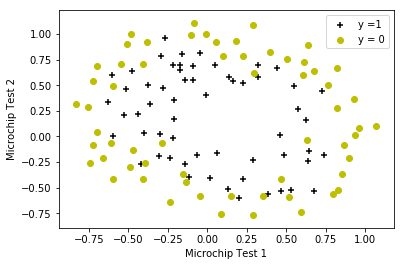

In [4]:
import numpy as np
import matplotlib.pyplot as plt


data = np.loadtxt('ex2data2.txt', delimiter=',')
x0 = data[:, 0:2]
y0 = data[:, -1][:, np.newaxis]

pos = np.where(y0.flatten() == 1)
neg = np.where(y0.flatten() == 0)

plt.figure(111)
plt.scatter(x0[pos, 0], x0[pos, 1], color='black', marker='+', label='y =1')
plt.scatter(x0[neg, 0], x0[neg, 1], color='y', marker='o', label='y = 0')
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend(loc='best')
plt.show()

### Feature mapping

In [6]:
def map_feature(x_1, x_2):
    degree = 6
    out = np.ones((x_1.shape[0], 1))
    for i in np.arange(1, degree + 1, 1):
        for j in np.arange(0, i + 1, 1):
            feature = (x_1 ** (i - j)) * (x_2 ** j)
            out = np.hstack((out, feature))
            
    return out

x_reg = map_feature(x0[:, 0:1], x0[:, 1:2])

### Cost function and gradient